In [1]:
import pandas as pd
import glob
import os

In [2]:
master = pd.read_csv('output/childcare/parsed/childcare-parsed.csv')

In [3]:
# 1--------
# determine number of rows for each of the file prior to deduplication
os.chdir('/Users/kt/.config/opentabulate.con/data/output/')

orig = []
orig_len = []
for c in glob.glob('*.csv'):
    orig.append(c)
    orig_len.append(len(pd.read_csv(c)))

# 2--------
# determine number of rows for each of the deduplicated files
os.chdir('/Users/kt/Documents/work/STATCAN/ODECF/Wrangling-ODECF/output/childcare/deduplicated/')

dedup = []
len_each = []

for c in glob.glob('*.csv'):
    dedup.append(c)
    len_each.append(len(pd.read_csv(c)))
    
# + determine number of rows for each of the standardized (non-duplicated) files
os.chdir('/Users/kt/.config/opentabulate.con/data/output/')

std = []

for c in glob.glob('*.csv'):
    if c not in dedup:
        std.append(c)
        len_each.append(len(pd.read_csv(c)))

In [4]:
print("Rows before deduplication: {}\nRows after deduplication: {}\nRows after merge: {}".format(sum(orig_len), sum(len_each), len(master)))

Rows before deduplication: 44408
Rows after deduplication: 25162
Rows after merge: 25162


In [23]:
# 3----------
# orig - deduplicated lengths to determine the expected number of rows removed from each

os.chdir('/Users/kt/Documents/work/STATCAN/ODECF/Wrangling-ODECF/output/childcare/deduplicated/')
for o, ol in zip(orig, orig_len):
        print("{} === before: {}".format(o, ol))

NT-childcare.csv === before: 282
NB-childcare.csv === before: 826
NS-childcare.csv === before: 367
AB-childcare.csv === before: 17282
NL-childcare.csv === before: 185
MB-childcare.csv === before: 2284
QC-childcare.csv === before: 7096
PE-childcare.csv === before: 77
BC-childcare.csv === before: 5030
SK-childcare.csv === before: 580
ON-childcare.csv === before: 6995
YT-childcare.csv === before: 50
NU-childcare.csv === before: 61
godaycare.csv === before: 3293


In [21]:
os.chdir('/Users/kt/Documents/work/STATCAN/ODECF/Wrangling-ODECF/output/childcare/deduplicated/')

for d in dedup:
    print("{} === after: {}".format(d, len(pd.read_csv(d))))

NT-childcare.csv === after: 131
NB-childcare.csv === after: 824
AB-childcare.csv === after: 2918
MB-childcare.csv === after: 1110
QC-childcare.csv === after: 3573
ON-childcare.csv === after: 6992
godaycare.csv === after: 3264


'godaycare.csv'

In [28]:
ntdiff = 282 - 131
nbdiff = 826-824
abdiff = 17282 - 2918
mbdiff = 2284-1110
qcdiff = 7096-3573
ondiff = 6995-6992
gdcdiff = 3293-3264

diffs = [ntdiff, nbdiff, abdiff, mbdiff, qcdiff, ondiff, gdcdiff]


Expected rows removed from deduplication: 19246


In [31]:
print("Expected rows removed from deduplication: {}\nRows removed from deduplication: {}\nExpected final row count: {}\nActual final row count: {}".format(sum(diffs), sum(orig_len) - sum(len_each), sum(orig_len)-sum(diffs), len(master)))

Expected rows removed from deduplication: 19246
Rows removed from deduplication: 19246
Expected final row count: 25162
Actual final row count: 25162


----
Jan 7, 2021

In [7]:
os.chdir('/Users/kt/Documents/work/STATCAN/Projects/ODECF/Collection-ODECF/data/education/')
orig = []
orig_len = []
for c in glob.glob('*.csv'):
    orig.append(c)
    orig_len.append(len(pd.read_csv(c)))

print(orig, orig_len)

['NT-education.csv', 'MB-education-2.csv', 'NU-education.csv', 'yt-education-2.csv', 'BC-strongstarts20200828.csv'] [49, 671, 45, 35, 288]


In [2]:
master = pd.read_csv('output/childcare/final/childcare-facilities.csv')

In [4]:
import missingno as msno

In [12]:
master.rename(columns = {"Unnamed: 0":'id'}, inplace = True)

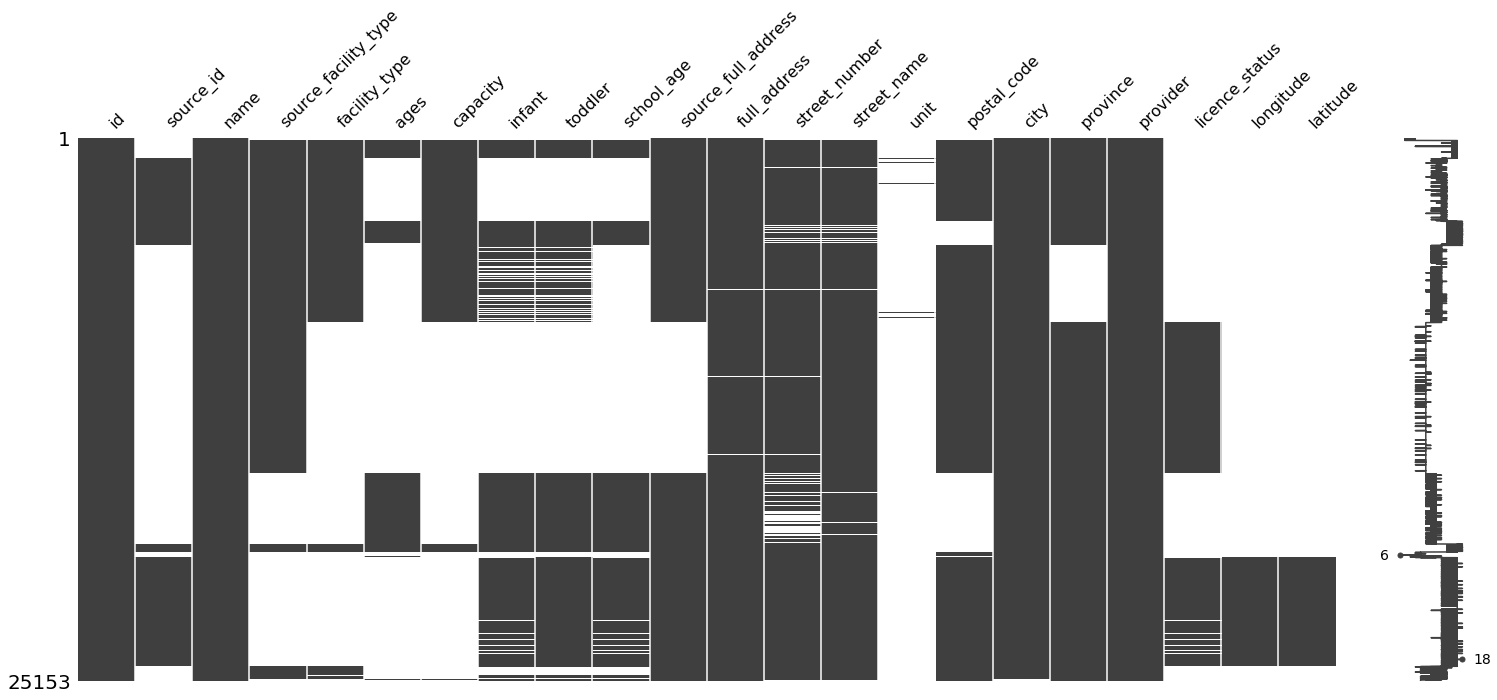

In [13]:
msno.matrix(master)